# Workbench snippets testing helper notebook

This notebook is useful for testing of existing snippets in situ on the workbench (e.g., in preprod or prod). It is also useful for testing and development of **new snippets**.

Use this notebook to:
* set up snippets using the latest code from GitHub
* manually test snippets via the Jupyter extension 'Snippets Menu'
* run all the smoke tests

# Setup

## Obtain the current snippets

Retrieve the code from https://github.com/all-of-us/workbench-snippets or a fork of this repository.

<div class="alert alert-block alert-warning">
<b>Note:</b> Edit the cell below if you would like to test code from a different branch or fork of the GitHub repository.
</div>

In [ ]:
%%bash

# Change these if you wish to use code from a different branch or fork.
FORK='all-of-us'
BRANCH='main'

if [ -d './workbench-snippets' ] ; then
    cd ./workbench-snippets
    git pull
    git checkout ${BRANCH}
    git status
    git log
else
    git clone https://github.com/${FORK}/workbench-snippets.git
    cd ./workbench-snippets
    git checkout ${BRANCH}
    git log
fi

## Install the associated Python package 

In [ ]:
%%bash

cd workbench-snippets/py
pip3 install --upgrade --no-deps .

## Create our configuration for the snippets extension

In [ ]:
%%bash
cd workbench-snippets/build/
python3 generate_jupyter_snippets_menu_extension_config.py

In [ ]:
%%bash
ls workbench-snippets/build/*json

# Manually install and test the snippets

See the screenshot below to help clarify these instructions.
1. enable Jupyter extension 'Snippets menu'
2. check the box next to *Insert snippets as new cells, rather than at cursor inside current cell*
3. check the box next to *Include custom menu content parsed from JSON string below*
4. copy and paste the generated block of json from this notebook into *JSON string parsed to define custom menus (only used if the option above is checked)*
5. create a brand new Python or R notebook and then use the *Snippets* menu to add code. (Or reload an existing notebook.)

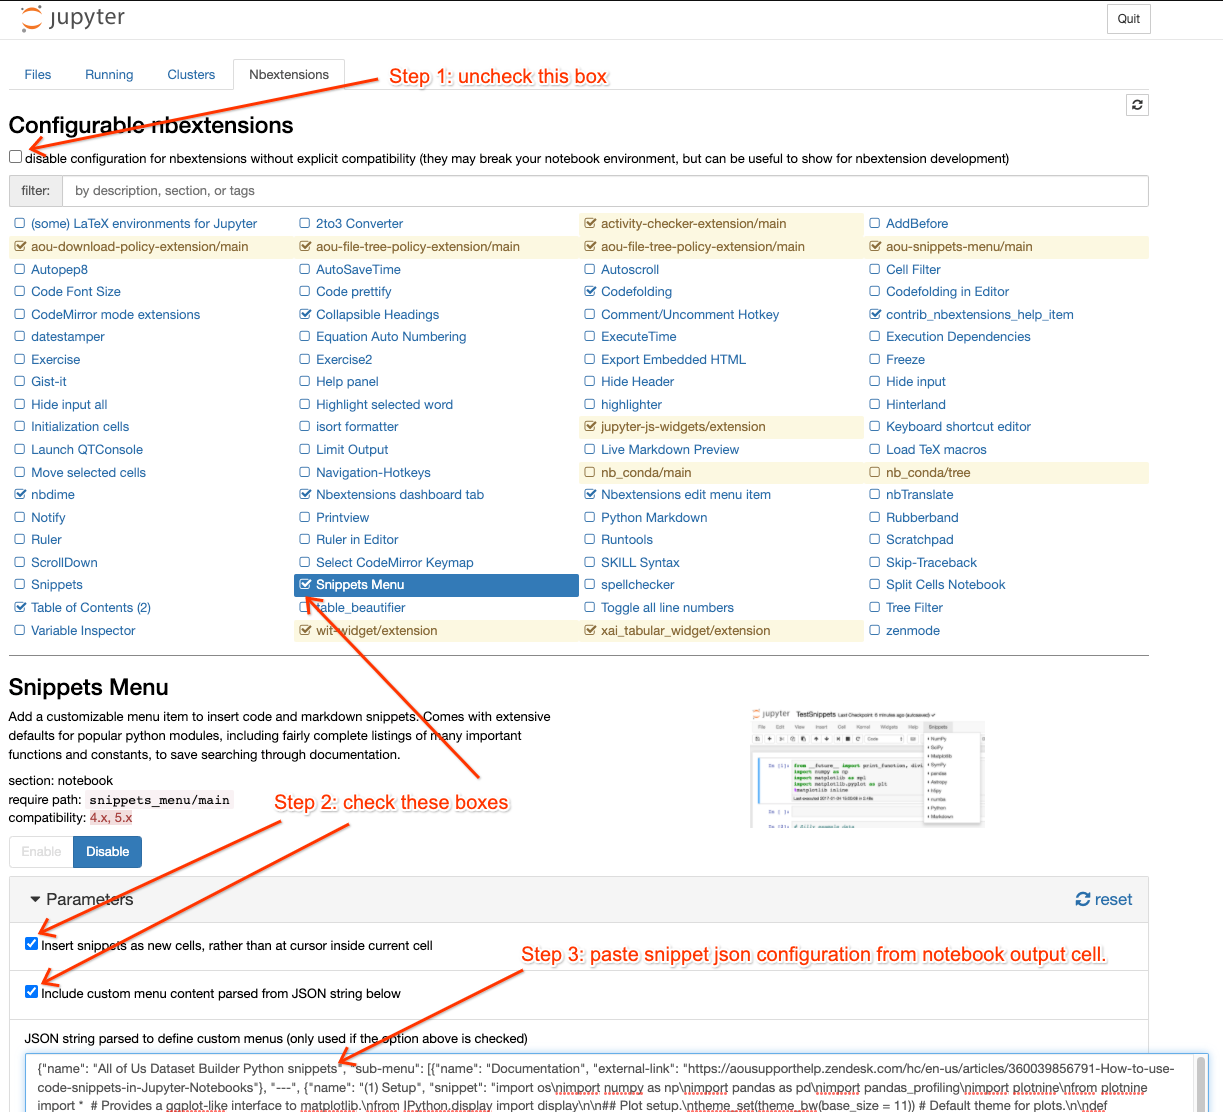

## Cloud Storage snippets

### Install and test the R Cloud Storage snippets

In [ ]:
%%bash
cat workbench-snippets/build/r_gcs_snippets_menu_config.json

### Install and test the Python Cloud Storage snippets


In [ ]:
%%bash
cat workbench-snippets/build/py_gcs_snippets_menu_config.json

## Dataset Builder snippets

### Install and test the R Dataset Builder snippets

In [ ]:
%%bash
cat workbench-snippets/build/r_dataset_snippets_menu_config.json

### Install and test the Python dataset builder snippets

In [ ]:
%%bash
cat workbench-snippets/build/py_dataset_snippets_menu_config.json

## SQL snippets 

### Install and test the R and SQL snippets

In [ ]:
%%bash
cat workbench-snippets/build/r_sql_snippets_menu_config.json

### Install and test the Python and SQL snippets

In [ ]:
%%bash
cat workbench-snippets/build/py_sql_snippets_menu_config.json

# Run the smoke tests

The script to auto-generate the Jupyter Snippets Menu configuration also emits both `*smoke_test.R` and `*smoke_test.py`. Those scripts each include, respectively, all the R snippets and all the Python snippets. If those scripts are run from the workbench environment and there are no obvious bugs in the snippets, they will run start-to-finish without error. (It won't necessarily catch all bugs, but its a good start.)

<div class="alert alert-block alert-warning">
<b>Note:</b> Be sure to check that the last line of output in all the cells below is <kbd>Smoke test complete!</kbd> to manually confirm that test did indeed succeed.
</div>


## Run GCS snippets smoke tests

The smoke tests will emit _"Smoke test complete!"_ when they have completed successfully.

In [ ]:
%%bash
cd ./workbench-snippets/build
Rscript r_gcs_snippets_menu_config_smoke_test.R  # There will be output, but there should be no errors.

In [ ]:
%%bash
cd ./workbench-snippets/build
python3 py_gcs_snippets_menu_config_smoke_test.py  # There will be output, but there should be no errors.

## Run SQL snippets smoke tests

The CDR that will be used is determined by the `WORKBENCH_CDR` environment variable. The example below shows how to override it, if desired.

The smoke tests will emit _"Smoke test complete!"_ when they have completed successfully.

In [ ]:
%%bash
cd ./workbench-snippets/build

Rscript r_sql_snippets_menu_config_smoke_test.R  # There will be output, but there should be no errors.

In [ ]:
%%bash
cd ./workbench-snippets/build

# Uncomment the line below if you wish to use a different CDR than the one associated with this workspace.
#export WORKSPACE_CDR='fc-aou-cdr-prod.<some other release>'

python3 py_sql_snippets_menu_config_smoke_test.py  # There will be output, but there should be no errors.

## Run Dataset Builder snippets smoke tests

In [ ]:
%%bash
cd ./workbench-snippets/build

Rscript r_dataset_snippets_menu_config_smoke_test.R  # There will be output, but there should be no errors.

In [ ]:
%%bash
cd ./workbench-snippets/build

python3 py_dataset_snippets_menu_config_smoke_test.py  # There will be output, but there should be no errors.

# Provenance

In [ ]:
import datetime
print(datetime.datetime.now())

In [ ]:
!pip3 freeze

Use of this source code is governed by a BSD-style license that can be found in the LICENSE file.